In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely.wkt
from geopandas.tools import sjoin


In [4]:
data=gpd.read_file(r"C:\Users\Janus\Downloads\Usos_de_suelo_Barranquilla_20231011.csv")

In [5]:
barrios=gpd.read_file(r'C:\Users\Janus\Desktop\sinu\Barrios.shp')

In [6]:
print(data.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   the_geom    2865 non-null   object  
 1   OBJECTID    2865 non-null   object  
 2   FID_Activi  2865 non-null   object  
 3   SIMB_ACTIV  2865 non-null   object  
 4   ACTIVIDAD   2865 non-null   object  
 5   POLIGONO    2865 non-null   object  
 6   NOMBRE_USO  2865 non-null   object  
 7   ETIQUETA    2865 non-null   object  
 8   AREA_HAS    2865 non-null   object  
 9   AREA_M2     2865 non-null   object  
 10  ID_USOS     2865 non-null   object  
 11  ID_POLIGON  2865 non-null   object  
 12  obser       2865 non-null   object  
 13  FID_LIMITE  2865 non-null   object  
 14  Id          2865 non-null   object  
 15  NOMBRE      2865 non-null   object  
 16  Area        2865 non-null   object  
 17  Shape_Leng  2865 non-null   object  
 18  Shape_Area  2865 non-null   object  
 19

In [7]:
data['geometry'] = data['the_geom'].apply(lambda x: shapely.wkt.loads(x) if x else None)


In [8]:
barrios.dropna(subset=['NOMBRE'])

ID                   NOMBRE  LOCALIDAD  AREA_HAS     AREA_M2  \
0      1              LAS GRANJAS        NaN     24.83   248250.61   
1      2         VILLA DEL CARMEN        NaN      2.85    28529.05   
2      3               7 DE ABRIL        NaN    114.63  1146302.92   
3      4              20 DE JULIO        NaN     32.26   322614.00   
4      5              BELLA ARENA        NaN     10.43   104254.88   
..   ...                      ...        ...       ...         ...   
182  183   CORREGIMIENTO LA PLAYA        NaN    179.69  1796858.46   
183  184  CORREGIMIENTO JUAN MINA        NaN     34.89   348895.57   
185  186            VILLA SEVILLA        NaN      8.08    80830.80   
186  187   PASEO DE LA CASTELLANA        NaN     43.94   439425.16   
188  189      VILLAS DE SAN PABLO        NaN    135.82  1358158.86   

                                              geometry  
0    POLYGON ((918492.997 1699626.372, 918443.188 1...  
1    POLYGON ((921873.051 1700729.806, 921858.965 1...  
2    POLYGON ((919550.773 1700761.727, 919575.951 1...  
3    POLYGON ((917777.750 1700933.980, 917889.564 1...  
4    POLYGON ((921599.625 1700730.124, 921590.719 1...  
..                                                 ...  
182  POLYGON ((913095.786 1712155.082, 913100.336 1...  
183  POLYGON ((910701.578 1703241.861, 910612.320 1...  
185  POLYGON ((920794.697 1699682.939, 920786.740 1...  
186  POLYGON ((917674.315 1710165.364, 917672.315 1...  
188  POLYGON ((913797.889 1703906.549, 914005.922 1...  

[179 rows x 6 columns]

In [9]:
data

the_geom OBJECTID FID_Activi  \
0     MULTIPOLYGON (((-74.77439398727235 10.95341004...        1          0   
1     MULTIPOLYGON (((-74.780344320288 10.9744828358...        2          1   
2     MULTIPOLYGON (((-74.78610784590661 10.97951100...        3          2   
3     MULTIPOLYGON (((-74.81962038301464 10.95967195...       10          9   
4     MULTIPOLYGON (((-74.80450509383381 10.94401358...      379        400   
...                                                 ...      ...        ...   
2860  MULTIPOLYGON (((-74.80989859369112 11.00599867...        0          0   
2861  MULTIPOLYGON (((-74.80397069646908 11.00374155...        0          0   
2862  MULTIPOLYGON (((-74.79630402187016 10.99838755...        0          0   
2863  MULTIPOLYGON (((-74.79959733745395 11.00279742...        0          0   
2864  MULTIPOLYGON (((-74.79769171981624 10.99718413...        0          0   

     SIMB_ACTIV              ACTIVIDAD POLIGONO  \
0           COM    Actividad Comercial    CAE-1   
1           COM    Actividad Comercial    CAE-1   
2           COM    Actividad Comercial    CAE-1   
3           COM    Actividad Comercial    CAE-2   
4           RES  Actividad Residencial    PR-1A   
...         ...                    ...      ...   
2860       SN-6     SECTOR NORMATIVO 6     SN-6   
2861       SN-5     SECTOR NORMATIVO 5     SN-5   
2862       SN-1     SECTOR NORMATIVO 1     SN-1   
2863       SN-4     SECTOR NORMATIVO 4     SN-4   
2864       SN-3     SECTOR NORMATIVO 3     SN-3   

                                    NOMBRE_USO ETIQUETA       AREA_HAS  \
0     Corredor de Actividad Economica - Tipo 1    CAE-1  7.01078775333   
1     Corredor de Actividad Economica - Tipo 1    CAE-1  1.48413831634   
2     Corredor de Actividad Economica - Tipo 1    CAE-1  2.67192074088   
3     Corredor de Actividad Economica - Tipo 2    CAE-2  8.84424312987   
4               Poligono Residencial - Tipo 1A    PR-1A   1.3058050113   
...                                        ...      ...            ...   
2860                                               SN-6              0   
2861                                               SN-5              0   
2862                                               SN-1              0   
2863                                               SN-4              0   
2864                                               SN-3              0   

            AREA_M2 ID_USOS ID_POLIGON obser FID_LIMITE Id NOMBRE Area  \
0     70107.8775333       3         96               -1  0           0   
1     14841.3831634       4         96               -1  0           0   
2     26719.2074088       5         96               -1  0           0   
3     88442.4312987      12        109               -1  0           0   
4      13058.050113     634        789               -1  0           0   
...             ...     ...        ...   ...        ... ..    ...  ...   
2860              0       0          0                0  0           0   
2861              0       0          0                0  0           0   
2862              0       0          0                0  0           0   
2863              0       0          0                0  0           0   
2864              0       0          0                0  0           0   

         Shape_Leng     Shape_Area  \
0     3041.95400091  70107.8669564   
1      1308.8822062  14791.1321816   
2     2016.34254433  26719.2140972   
3     3755.88159459  88442.4355237   
4     474.800268394  13058.0518789   
...             ...            ...   
2860              0              0   
2861              0              0   
2862              0              0   
2863              0              0   
2864              0              0   

                                               geometry  
0     MULTIPOLYGON (((-74.77439 10.95341, -74.77457 ...  
1     MULTIPOLYGON (((-74.78034 10.97448, -74.78066 ...  
2     MULTIPOLYGON (((-74.78611 10.97951, -74.78609 ...  
3     MULTIPOLYGON

In [10]:
data

the_geom OBJECTID FID_Activi  \
0     MULTIPOLYGON (((-74.77439398727235 10.95341004...        1          0   
1     MULTIPOLYGON (((-74.780344320288 10.9744828358...        2          1   
2     MULTIPOLYGON (((-74.78610784590661 10.97951100...        3          2   
3     MULTIPOLYGON (((-74.81962038301464 10.95967195...       10          9   
4     MULTIPOLYGON (((-74.80450509383381 10.94401358...      379        400   
...                                                 ...      ...        ...   
2860  MULTIPOLYGON (((-74.80989859369112 11.00599867...        0          0   
2861  MULTIPOLYGON (((-74.80397069646908 11.00374155...        0          0   
2862  MULTIPOLYGON (((-74.79630402187016 10.99838755...        0          0   
2863  MULTIPOLYGON (((-74.79959733745395 11.00279742...        0          0   
2864  MULTIPOLYGON (((-74.79769171981624 10.99718413...        0          0   

     SIMB_ACTIV              ACTIVIDAD POLIGONO  \
0           COM    Actividad Comercial    CAE-1   
1           COM    Actividad Comercial    CAE-1   
2           COM    Actividad Comercial    CAE-1   
3           COM    Actividad Comercial    CAE-2   
4           RES  Actividad Residencial    PR-1A   
...         ...                    ...      ...   
2860       SN-6     SECTOR NORMATIVO 6     SN-6   
2861       SN-5     SECTOR NORMATIVO 5     SN-5   
2862       SN-1     SECTOR NORMATIVO 1     SN-1   
2863       SN-4     SECTOR NORMATIVO 4     SN-4   
2864       SN-3     SECTOR NORMATIVO 3     SN-3   

                                    NOMBRE_USO ETIQUETA       AREA_HAS  \
0     Corredor de Actividad Economica - Tipo 1    CAE-1  7.01078775333   
1     Corredor de Actividad Economica - Tipo 1    CAE-1  1.48413831634   
2     Corredor de Actividad Economica - Tipo 1    CAE-1  2.67192074088   
3     Corredor de Actividad Economica - Tipo 2    CAE-2  8.84424312987   
4               Poligono Residencial - Tipo 1A    PR-1A   1.3058050113   
...                                        ...      ...            ...   
2860                                               SN-6              0   
2861                                               SN-5              0   
2862                                               SN-1              0   
2863                                               SN-4              0   
2864                                               SN-3              0   

            AREA_M2 ID_USOS ID_POLIGON obser FID_LIMITE Id NOMBRE Area  \
0     70107.8775333       3         96               -1  0           0   
1     14841.3831634       4         96               -1  0           0   
2     26719.2074088       5         96               -1  0           0   
3     88442.4312987      12        109               -1  0           0   
4      13058.050113     634        789               -1  0           0   
...             ...     ...        ...   ...        ... ..    ...  ...   
2860              0       0          0                0  0           0   
2861              0       0          0                0  0           0   
2862              0       0          0                0  0           0   
2863              0       0          0                0  0           0   
2864              0       0          0                0  0           0   

         Shape_Leng     Shape_Area  \
0     3041.95400091  70107.8669564   
1      1308.8822062  14791.1321816   
2     2016.34254433  26719.2140972   
3     3755.88159459  88442.4355237   
4     474.800268394  13058.0518789   
...             ...            ...   
2860              0              0   
2861              0              0   
2862              0              0   
2863              0              0   
2864              0              0   

                                               geometry  
0     MULTIPOLYGON (((-74.77439 10.95341, -74.77457 ...  
1     MULTIPOLYGON (((-74.78034 10.97448, -74.78066 ...  
2     MULTIPOLYGON (((-74.78611 10.97951, -74.78609 ...  
3     MULTIPOLYGON

In [11]:
data[['AREA_HAS', 'AREA_M2', 'Shape_Leng', 'Shape_Area','OBJECTID']] = data[['AREA_HAS', 'AREA_M2', 'Shape_Leng', 'Shape_Area','OBJECTID']].astype(float)

In [12]:
data = data.drop(columns='the_geom')

In [13]:
data

OBJECTID FID_Activi SIMB_ACTIV              ACTIVIDAD POLIGONO  \
0          1.0          0        COM    Actividad Comercial    CAE-1   
1          2.0          1        COM    Actividad Comercial    CAE-1   
2          3.0          2        COM    Actividad Comercial    CAE-1   
3         10.0          9        COM    Actividad Comercial    CAE-2   
4        379.0        400        RES  Actividad Residencial    PR-1A   
...        ...        ...        ...                    ...      ...   
2860       0.0          0       SN-6     SECTOR NORMATIVO 6     SN-6   
2861       0.0          0       SN-5     SECTOR NORMATIVO 5     SN-5   
2862       0.0          0       SN-1     SECTOR NORMATIVO 1     SN-1   
2863       0.0          0       SN-4     SECTOR NORMATIVO 4     SN-4   
2864       0.0          0       SN-3     SECTOR NORMATIVO 3     SN-3   

                                    NOMBRE_USO ETIQUETA  AREA_HAS  \
0     Corredor de Actividad Economica - Tipo 1    CAE-1  7.010788   
1     Corredor de Actividad Economica - Tipo 1    CAE-1  1.484138   
2     Corredor de Actividad Economica - Tipo 1    CAE-1  2.671921   
3     Corredor de Actividad Economica - Tipo 2    CAE-2  8.844243   
4               Poligono Residencial - Tipo 1A    PR-1A  1.305805   
...                                        ...      ...       ...   
2860                                               SN-6  0.000000   
2861                                               SN-5  0.000000   
2862                                               SN-1  0.000000   
2863                                               SN-4  0.000000   
2864                                               SN-3  0.000000   

           AREA_M2 ID_USOS ID_POLIGON obser FID_LIMITE Id NOMBRE Area  \
0     70107.877533       3         96               -1  0           0   
1     14841.383163       4         96               -1  0           0   
2     26719.207409       5         96               -1  0           0   
3     88442.431299      12        109               -1  0           0   
4     13058.050113     634        789               -1  0           0   
...            ...     ...        ...   ...        ... ..    ...  ...   
2860      0.000000       0          0                0  0           0   
2861      0.000000       0          0                0  0           0   
2862      0.000000       0          0                0  0           0   
2863      0.000000       0          0                0  0           0   
2864      0.000000       0          0                0  0           0   

       Shape_Leng    Shape_Area  \
0     3041.954001  70107.866956   
1     1308.882206  14791.132182   
2     2016.342544  26719.214097   
3     3755.881595  88442.435524   
4      474.800268  13058.051879   
...           ...           ...   
2860     0.000000      0.000000   
2861     0.000000      0.000000   
2862     0.000000      0.000000   
2863     0.000000      0.000000   
2864     0.000000      0.000000   

                                               geometry  
0     MULTIPOLYGON (((-74.77439 10.95341, -74.77457 ...  
1     MULTIPOLYGON (((-74.78034 10.97448, -74.78066 ...  
2     MULTIPOLYGON (((-74.78611 10.97951, -74.78609 ...  
3     MULTIPOLYGON (((-74.81962 10.95967, -74.81963 ...  
4     MULTIPOLYGON (((-74.80451 10.94401, -74.80476 ...  
...                                                 ...  
2860  MULTIPOLYGON (((-74.80990 11.00600, -74.80793 ...  
2861  MULTIPOLYGON (((-74.80397 11.00374, -74.80088 ...  
2862  MULTIPOLYGON (((-74.79630 10.99839, -74.79631 ...  
2863  MULTIPOLYGON (((-74.79960 11.00280, -74.79959 ...  
2864  MULTIPOLYGON (((-74.79769 10.99718, -74.79769 ...  

[2865 rows x 19 columns]

In [14]:
# Establecer el CRS de 'data'
data.set_crs(epsg=4326, inplace=True)  # Reemplaza 4326 con el código EPSG correcto si es diferente

# Reproyectar el GeoDataFrame de barrios para que coincida con el CRS de 'data'
barrios = barrios.to_crs(data.crs)

In [15]:
data

OBJECTID FID_Activi SIMB_ACTIV              ACTIVIDAD POLIGONO  \
0          1.0          0        COM    Actividad Comercial    CAE-1   
1          2.0          1        COM    Actividad Comercial    CAE-1   
2          3.0          2        COM    Actividad Comercial    CAE-1   
3         10.0          9        COM    Actividad Comercial    CAE-2   
4        379.0        400        RES  Actividad Residencial    PR-1A   
...        ...        ...        ...                    ...      ...   
2860       0.0          0       SN-6     SECTOR NORMATIVO 6     SN-6   
2861       0.0          0       SN-5     SECTOR NORMATIVO 5     SN-5   
2862       0.0          0       SN-1     SECTOR NORMATIVO 1     SN-1   
2863       0.0          0       SN-4     SECTOR NORMATIVO 4     SN-4   
2864       0.0          0       SN-3     SECTOR NORMATIVO 3     SN-3   

                                    NOMBRE_USO ETIQUETA  AREA_HAS  \
0     Corredor de Actividad Economica - Tipo 1    CAE-1  7.010788   
1     Corredor de Actividad Economica - Tipo 1    CAE-1  1.484138   
2     Corredor de Actividad Economica - Tipo 1    CAE-1  2.671921   
3     Corredor de Actividad Economica - Tipo 2    CAE-2  8.844243   
4               Poligono Residencial - Tipo 1A    PR-1A  1.305805   
...                                        ...      ...       ...   
2860                                               SN-6  0.000000   
2861                                               SN-5  0.000000   
2862                                               SN-1  0.000000   
2863                                               SN-4  0.000000   
2864                                               SN-3  0.000000   

           AREA_M2 ID_USOS ID_POLIGON obser FID_LIMITE Id NOMBRE Area  \
0     70107.877533       3         96               -1  0           0   
1     14841.383163       4         96               -1  0           0   
2     26719.207409       5         96               -1  0           0   
3     88442.431299      12        109               -1  0           0   
4     13058.050113     634        789               -1  0           0   
...            ...     ...        ...   ...        ... ..    ...  ...   
2860      0.000000       0          0                0  0           0   
2861      0.000000       0          0                0  0           0   
2862      0.000000       0          0                0  0           0   
2863      0.000000       0          0                0  0           0   
2864      0.000000       0          0                0  0           0   

       Shape_Leng    Shape_Area  \
0     3041.954001  70107.866956   
1     1308.882206  14791.132182   
2     2016.342544  26719.214097   
3     3755.881595  88442.435524   
4      474.800268  13058.051879   
...           ...           ...   
2860     0.000000      0.000000   
2861     0.000000      0.000000   
2862     0.000000      0.000000   
2863     0.000000      0.000000   
2864     0.000000      0.000000   

                                               geometry  
0     MULTIPOLYGON (((-74.77439 10.95341, -74.77457 ...  
1     MULTIPOLYGON (((-74.78034 10.97448, -74.78066 ...  
2     MULTIPOLYGON (((-74.78611 10.97951, -74.78609 ...  
3     MULTIPOLYGON (((-74.81962 10.95967, -74.81963 ...  
4     MULTIPOLYGON (((-74.80451 10.94401, -74.80476 ...  
...                                                 ...  
2860  MULTIPOLYGON (((-74.80990 11.00600, -74.80793 ...  
2861  MULTIPOLYGON (((-74.80397 11.00374, -74.80088 ...  
2862  MULTIPOLYGON (((-74.79630 10.99839, -74.79631 ...  
2863  MULTIPOLYGON (((-74.79960 11.00280, -74.79959 ...  
2864  MULTIPOLYGON (((-74.79769 10.99718, -74.79769 ...  

[2865 rows x 19 columns]

In [16]:
data = sjoin(data, barrios, how="inner", op="intersects")

C:\Users\Janus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [17]:
data

OBJECTID FID_Activi SIMB_ACTIV  \
0          1.0          0        COM   
114       78.0         84          I   
131      561.0        586          I   
134      115.0        122       INST   
343      298.0        318        RES   
...        ...        ...        ...   
2739    2851.0       2291         EP   
2742    2854.0       2294         EP   
2743    2855.0       2295         EP   
2744    2856.0       2296         EP   
2853       0.0          0       SN-2   

                                        ACTIVIDAD POLIGONO  \
0                             Actividad Comercial    CAE-1   
114   Institucional Anexo Resolucion 0019 de 2016        I   
131   Institucional Anexo Resolucion 0019 de 2016        I   
134               Area de Actividad Institucional     INST   
343                         Actividad Residencial    PR-1A   
...                                           ...      ...   
2739                              Espacio Publico       EP   
2742                              Espacio Publico       EP   
2743                              Espacio Publico       EP   
2744                              Espacio Publico       EP   
2853                           SECTOR NORMATIVO 2     SN-2   

                                       NOMBRE_USO ETIQUETA  AREA_HAS_left  \
0        Corredor de Actividad Economica - Tipo 1    CAE-1       7.010788   
114   Institucional Anexo Resolucion 0019 de 2016        I       0.706090   
131   Institucional Anexo Resolucion 0019 de 2016        I       0.169493   
134                                 Institucional     INST       0.939687   
343                Poligono Residencial - Tipo 1A    PR-1A       1.142366   
...                                           ...      ...            ...   
2739                       Espacio Publico Actual                0.367387   
2742                       Espacio Publico Actual                0.006835   
2743                       Espacio Publico Actual                0.005965   
2744                       Espacio Publico Actual                0.004611   
2853                                                  SN-2       0.000000   

      AREA_M2_left ID_USOS  ...           Area   Shape_Leng    Shape_Area  \
0     70107.877533       3  ...              0  3041.954001  70107.866956   
114    7060.903910      99  ...              0   354.872833   7060.905349   
131    1694.926914     861  ...              0   174.907902   1694.927807   
134    9396.871999     145  ...              0   439.389354   9396.871999   
343   11423.662719     538  ...              0   737.860699  11423.662491   
...            ...     ...  ...            ...          ...           ...   
2739   3673.867645    1064  ...  310.979316934   310.511094   3673.865425   
2742     68.353194    1064  ...  310.979316934   120.438775     68.353179   
2743     59.650034    1064  ...  310.979316934   102.396498     59.650034   
2744     46.114362    1064  ...  310.979316934   112.048792     46.114112   
2853      0.000000       0  ...              0     0.000000      0.000000   

                                               geometry index_right   ID  \
0     MULTIPOLYGON (((-74.77439 10.95341, -74.77457 ...          45   46   
114   MULTIPOLYGON (((-74.77618 10.95304, -74.77614 ...          45   46   
131   MULTIPOLYGON (((-74.78192 10.95965, -74.78176 ...          45   46   
134   MULTIPOLYGON (((-74.78051 10.95616, -74.78081 ...          45   46   
343   MULTIPOLYGON (((-74.78397 10.95214, -74.78397 ...          45   46   
...                                                 ...         ...  ...   
2739  MULTIPOLYGON (((-74.79556 11.00194, -74.79556 ...         128  129   
2742  MULTIPOLYGON (((-74.79681 11.00248, -74.79681 ...         128  129   
2743  MULTIPOLYGON (((-74.79618 11.00293, -74.79618 ...         128  129   
2744  MULTIPOLYGON (((-74.79560 11.00336, -74.79560 ...         128  129   
2853  MULTIPOLYGON (((-74.78914 10.99072, -74.78915 ...         128  129   

      NOMBRE_righ

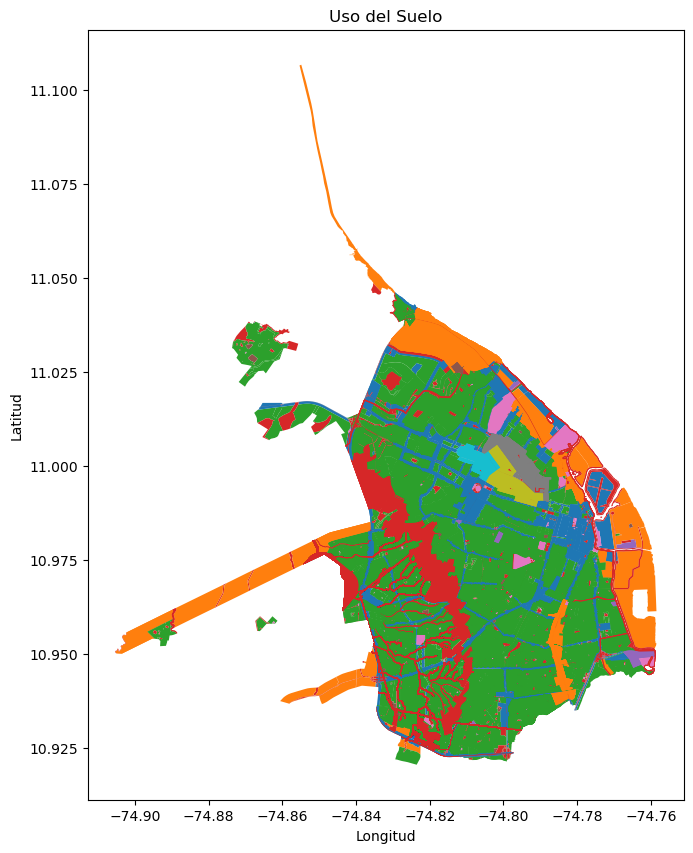

In [18]:
data.plot(column='ACTIVIDAD', legend=False, figsize=(10, 10))

# Añadir título y etiquetas
plt.title('Uso del Suelo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()

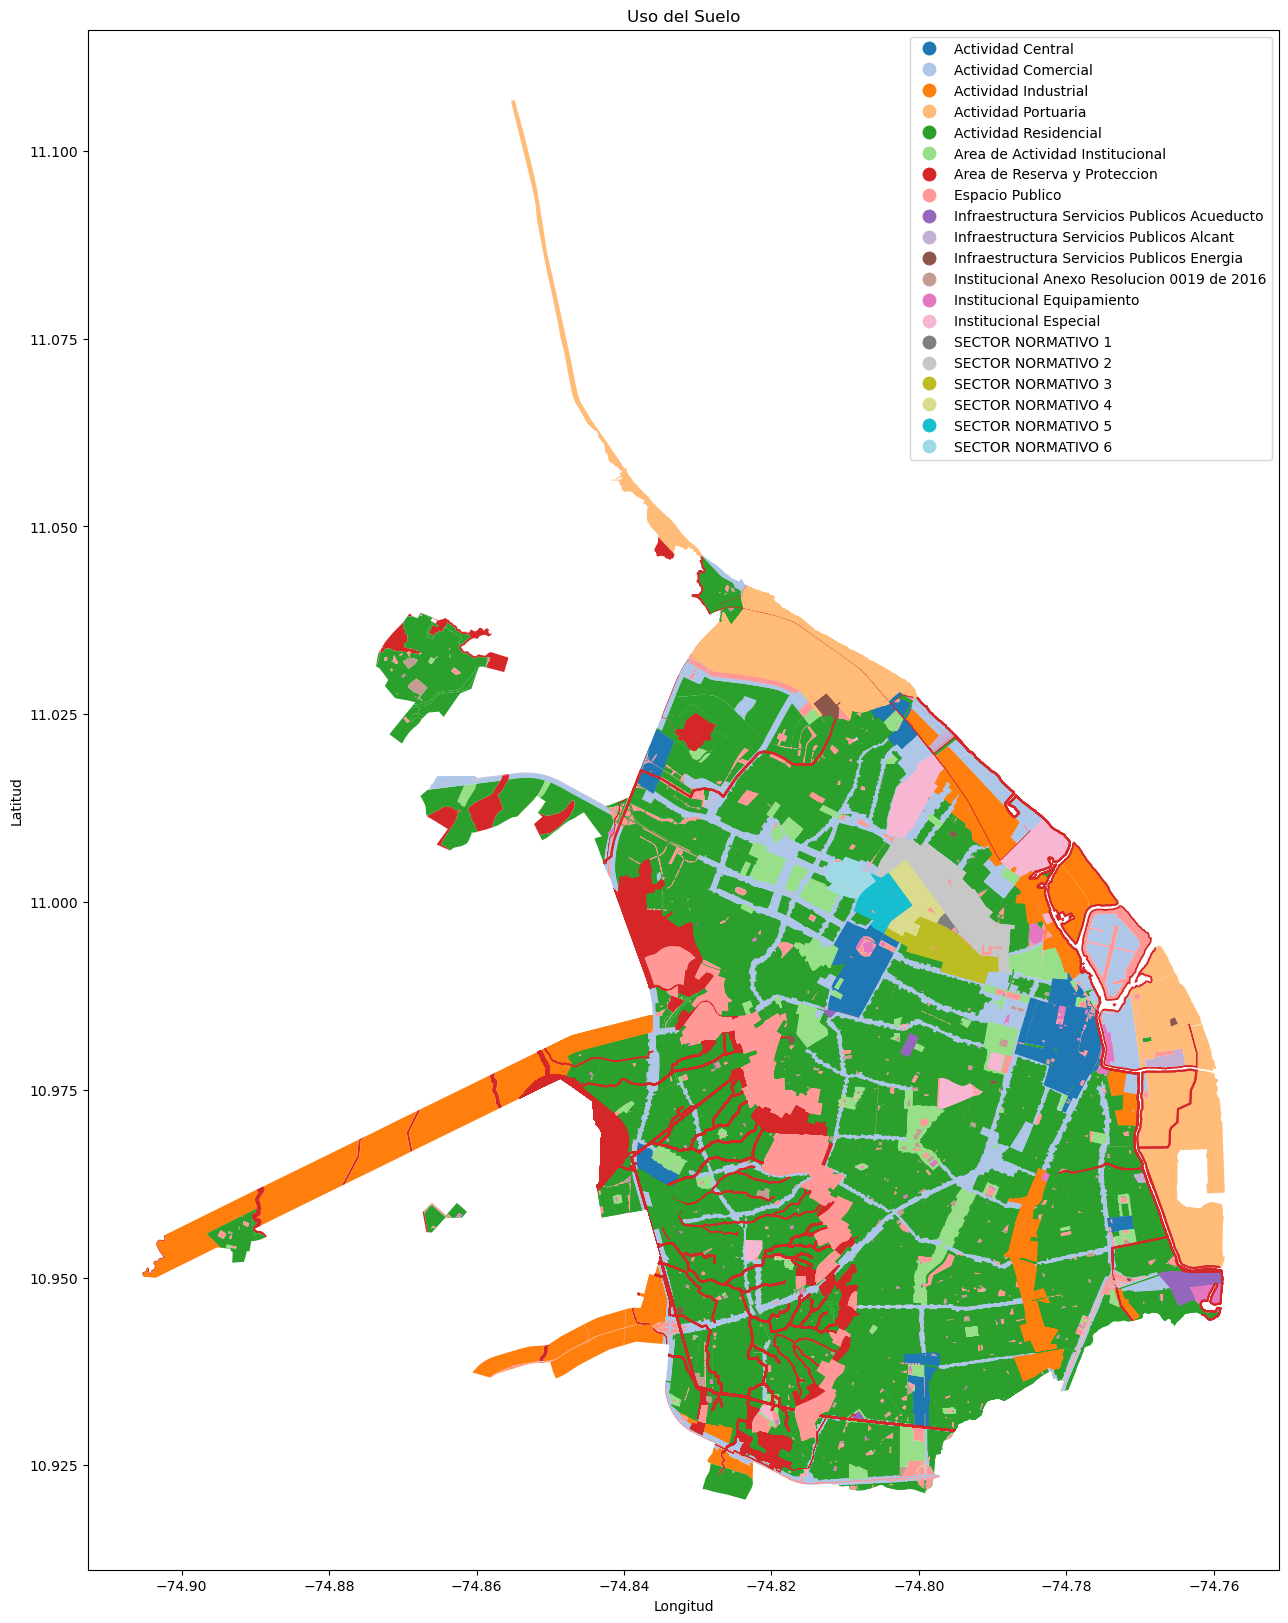

In [46]:
# Graficar el uso del suelo
ax = data.plot(column='ACTIVIDAD', legend=True, figsize=(20, 20),cmap='tab20')

# Añadir título y etiquetas
plt.title('Uso del Suelo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()

In [20]:
data1=data

In [21]:
data1=data1.set_index('geometry')

In [22]:
import plotly.express as px


In [23]:

frecuencias = data.groupby(['NOMBRE_right', 'ACTIVIDAD']).size().reset_index(name='frecuencia')


In [24]:
frecuencias1 = frecuencias.merge(data, left_on='NOMBRE_right', right_on='NOMBRE_right')



In [25]:
frecuencias['geometry']=frecuencias1['geometry']

In [26]:
frecuencias=gpd.GeoDataFrame(frecuencias,geometry='geometry')

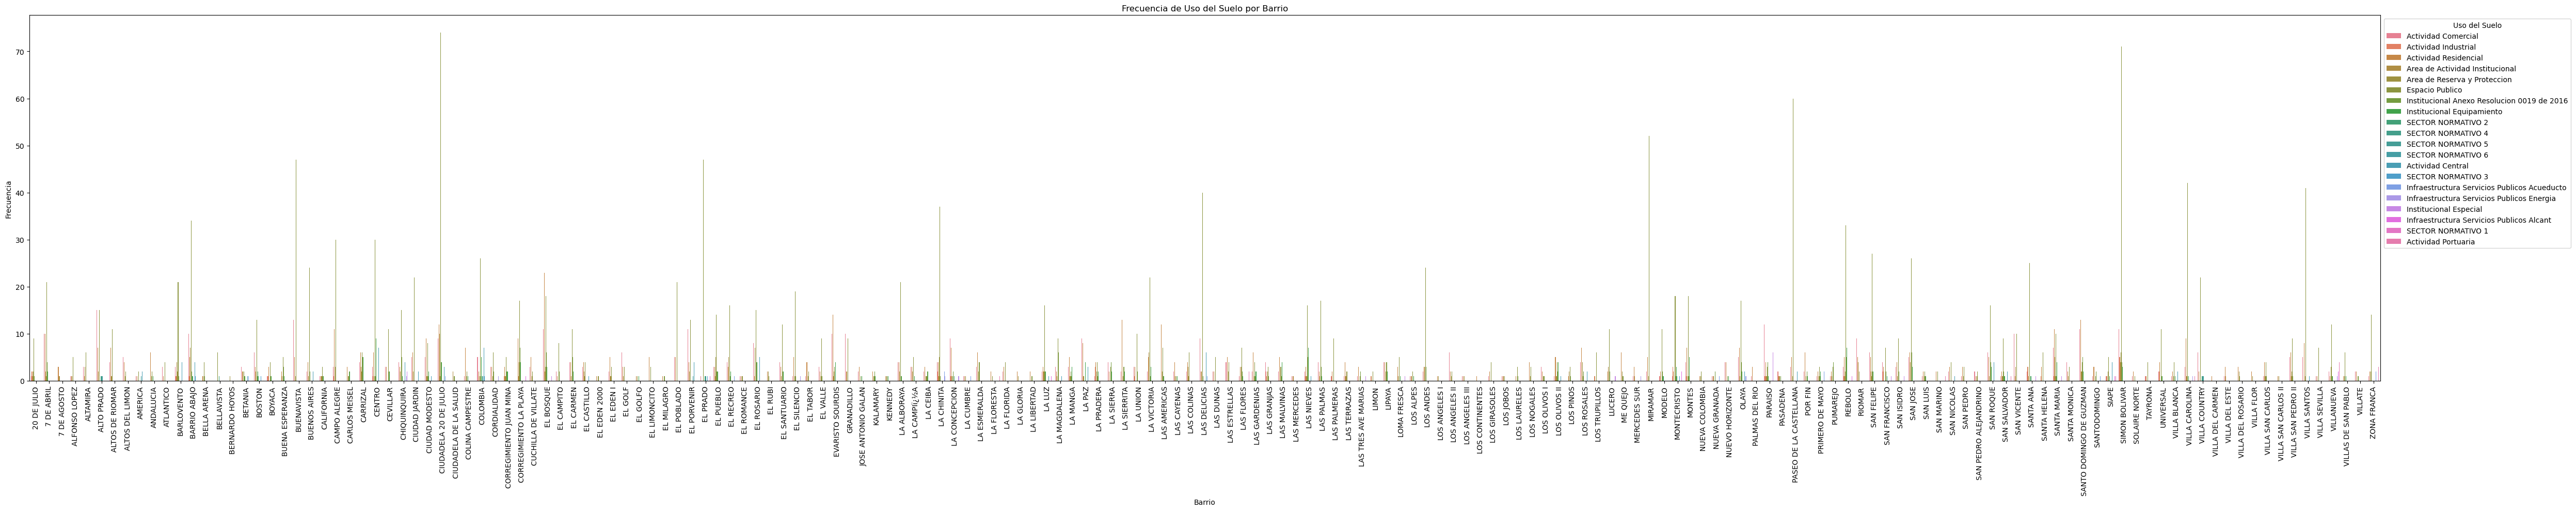

In [27]:
plt.figure(figsize=(50, 10))  
sns.barplot(x='NOMBRE_right', y='frecuencia', hue='ACTIVIDAD', data=frecuencias,linewidth=5.0)
plt.title('Frecuencia de Uso del Suelo por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.legend(title='Uso del Suelo', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:
frecuencias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   NOMBRE_right  950 non-null    object  
 1   ACTIVIDAD     950 non-null    object  
 2   frecuencia    950 non-null    int64   
 3   geometry      950 non-null    geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 29.8+ KB


In [29]:
df_pivot = frecuencias.pivot(index='ACTIVIDAD', columns='NOMBRE_right', values='frecuencia')


In [30]:
df_pivot.fillna(0, inplace=True)


In [31]:
df_pivot

NOMBRE_right                                  20 DE JULIO  7 DE ABRIL  \
ACTIVIDAD                                                               
Actividad Central                                     0.0         0.0   
Actividad Comercial                                   1.0        10.0   
Actividad Industrial                                  2.0         0.0   
Actividad Portuaria                                   0.0         0.0   
Actividad Residencial                                 2.0        10.0   
Area de Actividad Institucional                       1.0         2.0   
Area de Reserva y Proteccion                          2.0         1.0   
Espacio Publico                                       9.0        21.0   
Infraestructura Servicios Publicos Acueducto          0.0         0.0   
Infraestructura Servicios Publicos Alcant             0.0         0.0   
Infraestructura Servicios Publicos Energia            0.0         0.0   
Institucional Anexo Resolucion 0019 de 2016           1.0         4.0   
Institucional Equipamiento                            0.0         2.0   
Institucional Especial                                0.0         0.0   
SECTOR NORMATIVO 1                                    0.0         0.0   
SECTOR NORMATIVO 2                                    0.0         0.0   
SECTOR NORMATIVO 3                                    0.0         0.0   
SECTOR NORMATIVO 4                                    0.0         0.0   
SECTOR NORMATIVO 5                                    0.0         0.0   
SECTOR NORMATIVO 6                                    0.0         0.0   

NOMBRE_right                                  7 DE AGOSTO  ALFONSO LOPEZ  \
ACTIVIDAD                                                                  
Actividad Central                                     0.0            0.0   
Actividad Comercial                                   0.0            1.0   
Actividad Industrial                                  0.0            0.0   
Actividad Portuaria                                   0.0            0.0   
Actividad Residencial                                 3.0            1.0   
Area de Actividad Institucional                       1.0            1.0   
Area de Reserva y Proteccion                          1.0            0.0   
Espacio Publico                                       0.0            5.0   
Infraestructura Servicios Publicos Acueducto          0.0            0.0   
Infraestructura Servicios Publicos Alcant             0.0            0.0   
Infraestructura Servicios Publicos Energia            0.0            0.0   
Institucional Anexo Resolucion 0019 de 2016           0.0            0.0   
Institucional Equipamiento                            0.0            0.0   
Institucional Especial                                0.0            0.0   
SECTOR NORMATIVO 1                                    0.0            0.0   
SECTOR NORMATIVO 2                                    0.0            0.0   
SECTOR NORMATIVO 3                                    0.0            0.0   
SECTOR NORMATIVO 4                                    0.0            0.0   
SECTOR NORMATIVO 5                                    0.0            0.0   
SECTOR NORMATIVO 6                                    0.0            0.0   

NOMBRE_right                                  ALTAMIRA  ALTO PRADO  \
ACTIVIDAD                                                            
Actividad Central                                  0.0         0.0   
Actividad Comercial                                3.0        15.0   
Actividad Industrial                               0.0         0.0   
Actividad Portuaria                                0.0         0.0   
Actividad Residencial                              1.0         7.0   
Area de Actividad Institucional                    3.0         2.0   
Area de Reserva y Proteccion                       0.0         0.0   
Espacio Publico                                    6.0        15.0   
Infraestructura Serv

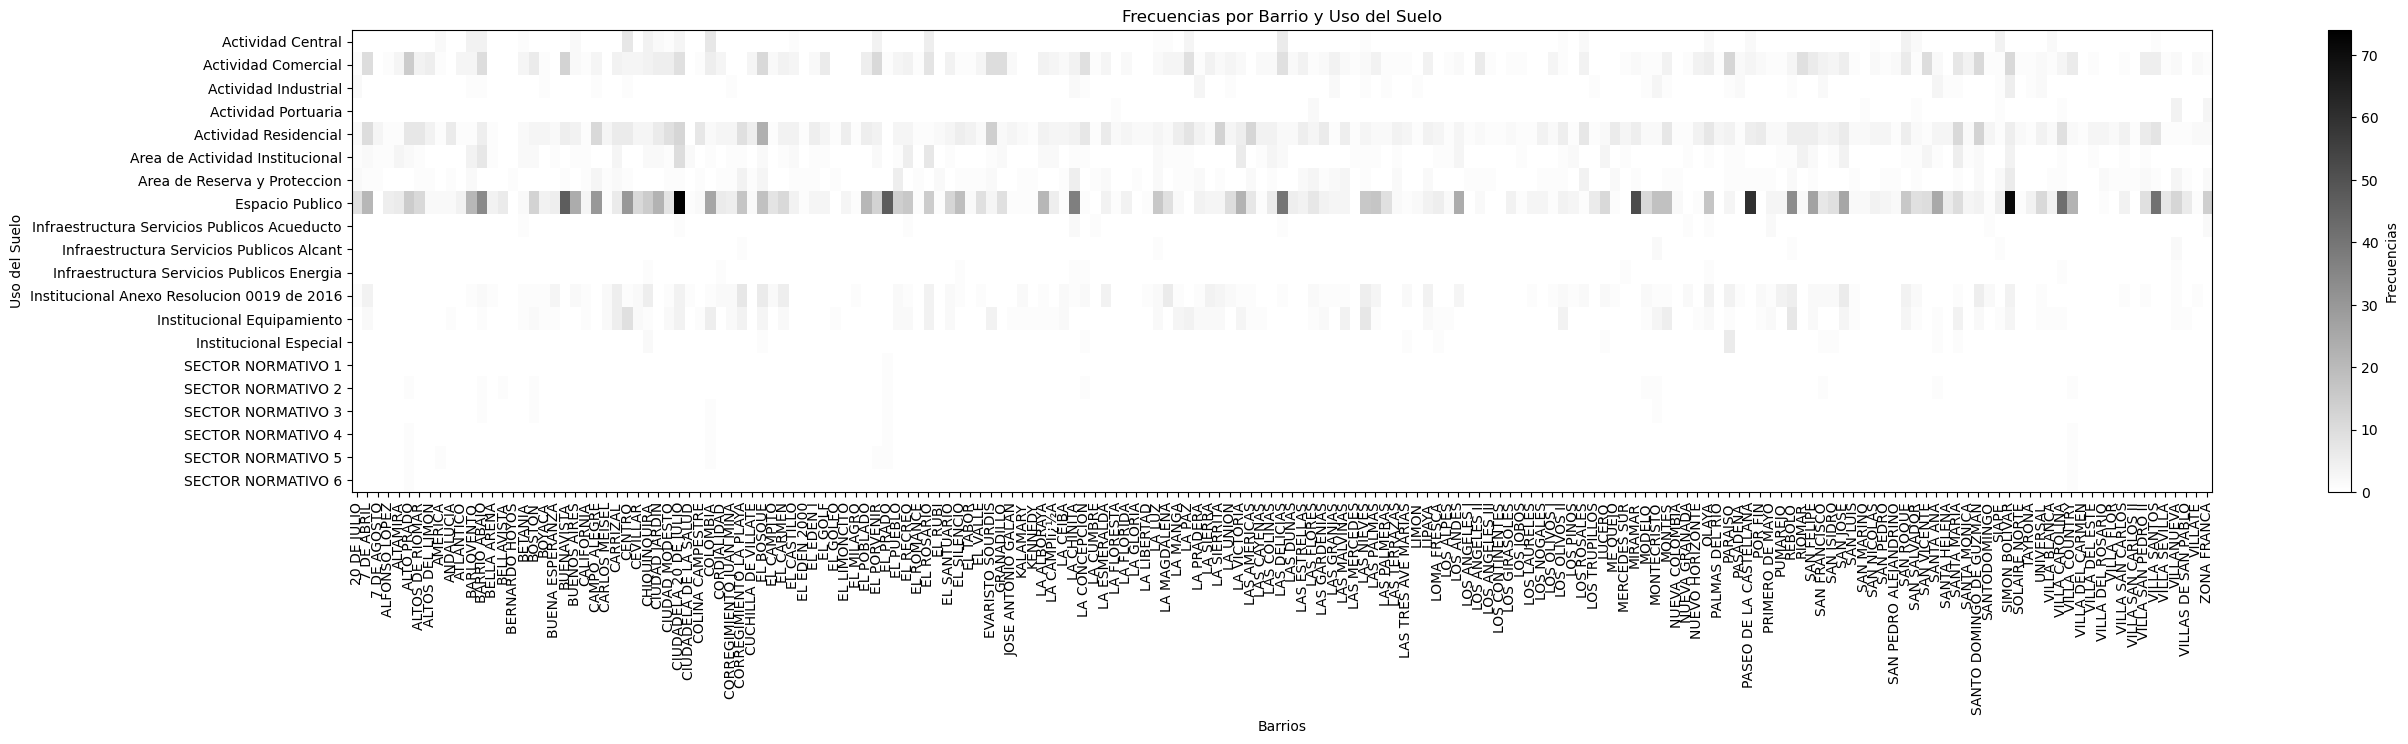

In [32]:
plt.figure(figsize=(30, 6))
plt.imshow(df_pivot, cmap='binary', interpolation='nearest', aspect='auto')

# Configurar etiquetas y título
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation=90)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias por Barrio y Uso del Suelo')

# Mostrar la barra de color
plt.colorbar(label='Frecuencias')

# Mostrar el gráfico
plt.show()

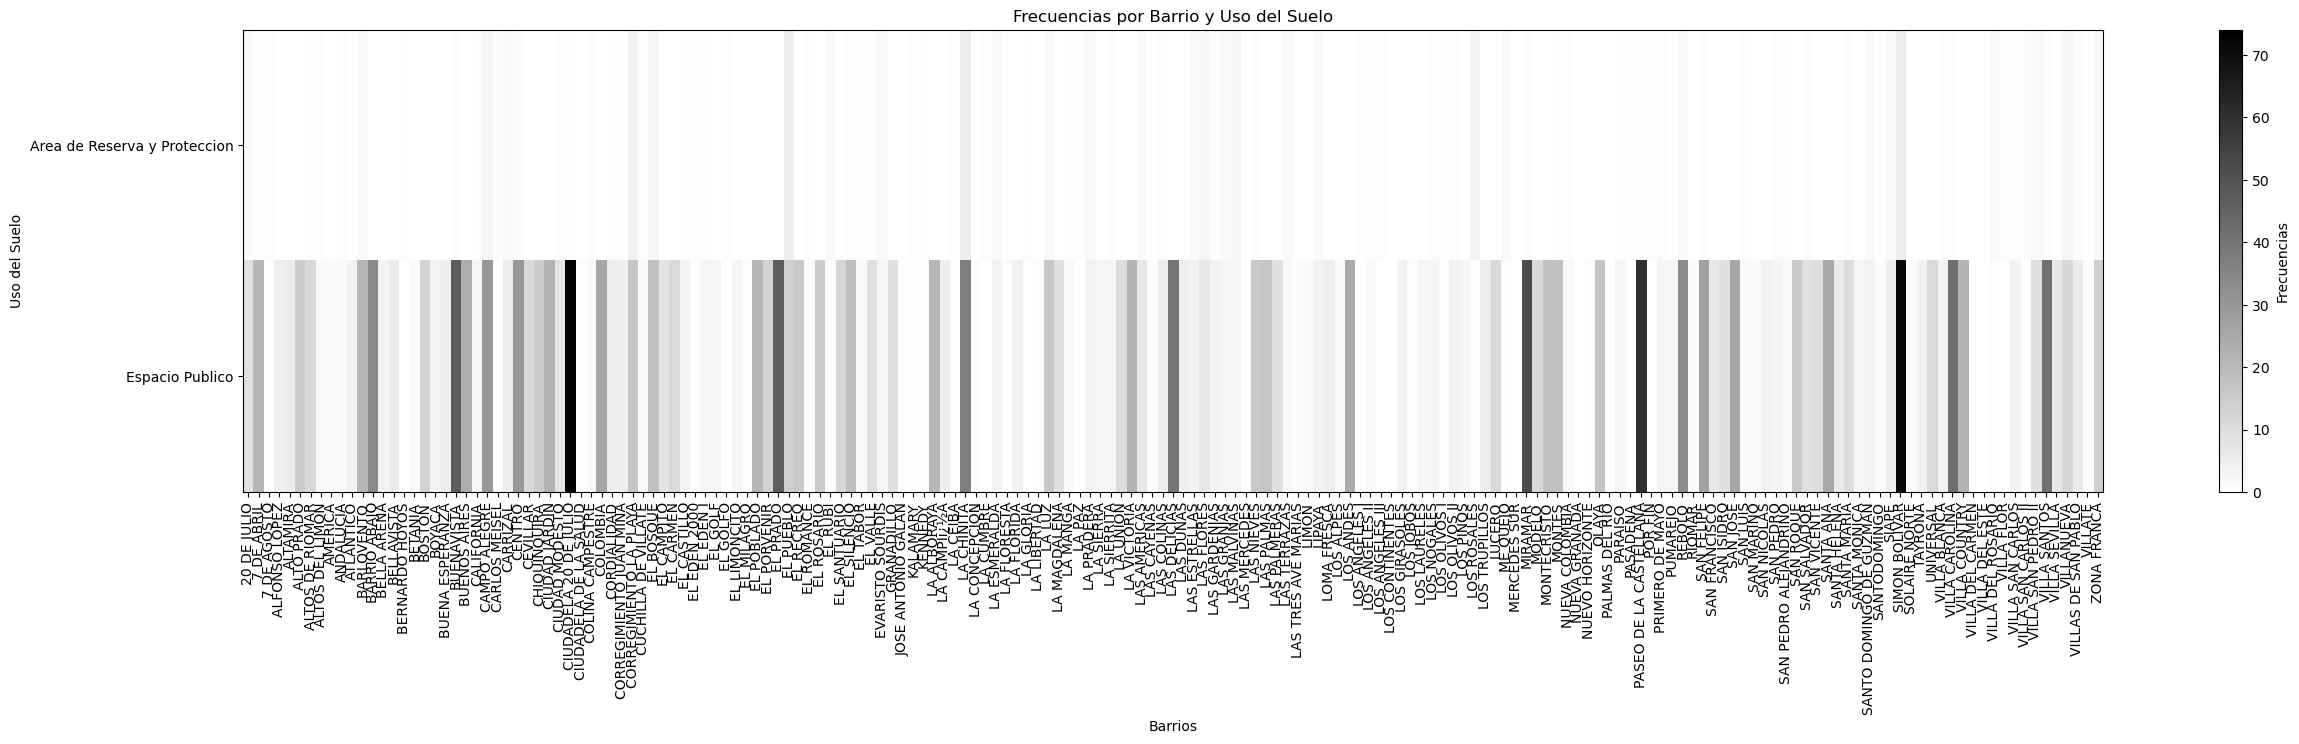

In [33]:

# Filtrar las filas 7 y 8
df_pivot_subset = df_pivot.iloc[6:8, :]

plt.figure(figsize=(30, 6))
plt.imshow(df_pivot_subset, cmap='binary', interpolation='nearest', aspect='auto')

# Configurar etiquetas y título
plt.xticks(range(len(df_pivot_subset.columns)), df_pivot_subset.columns, rotation=90)
plt.yticks(range(len(df_pivot_subset.index)), df_pivot_subset.index)
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias por Barrio y Uso del Suelo')

# Mostrar la barra de color
plt.colorbar(label='Frecuencias')

# Mostrar el gráfico
plt.show()

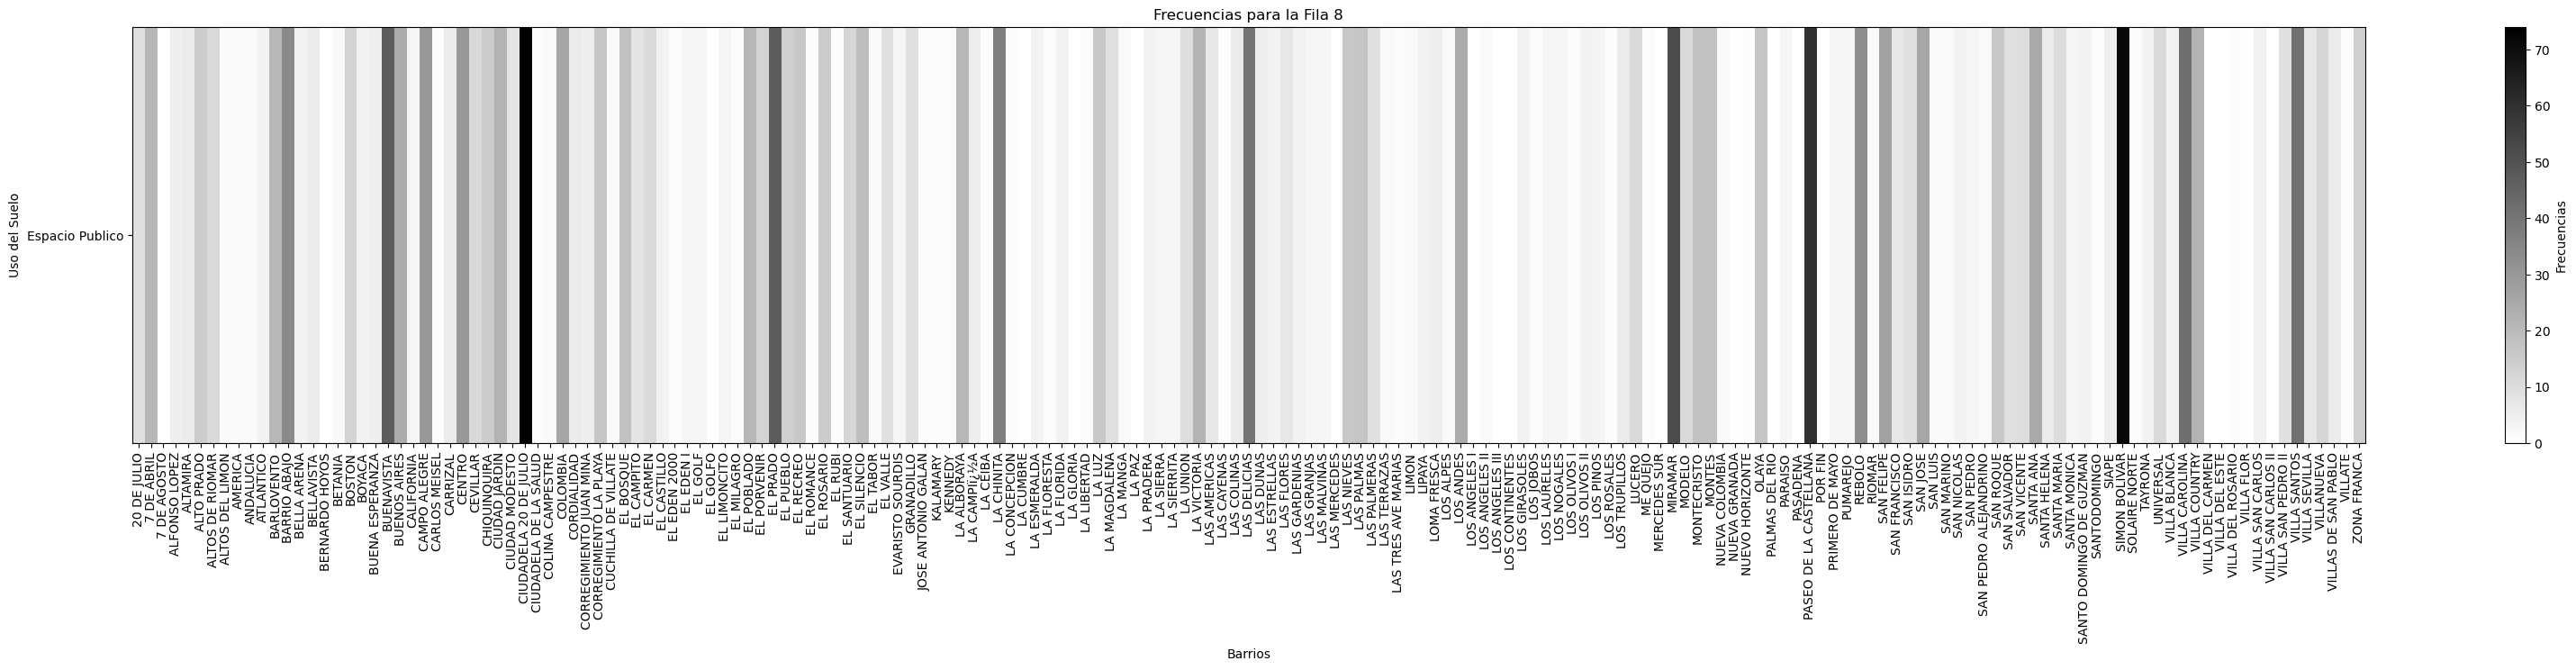

In [44]:

# Filtrar la fila 8
df_pivot_row8 = df_pivot.iloc[7:8, :]
plt.figure(figsize=(40, 6))
plt.imshow(df_pivot_row8, cmap='binary', interpolation='nearest', aspect='auto')
plt.xticks(range(len(df_pivot_row8.columns)), df_pivot_row8.columns, rotation=90)
plt.yticks([0], [df_pivot_row8.index[0]])
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias para la Fila 8')
plt.colorbar(label='Frecuencias')
plt.show()

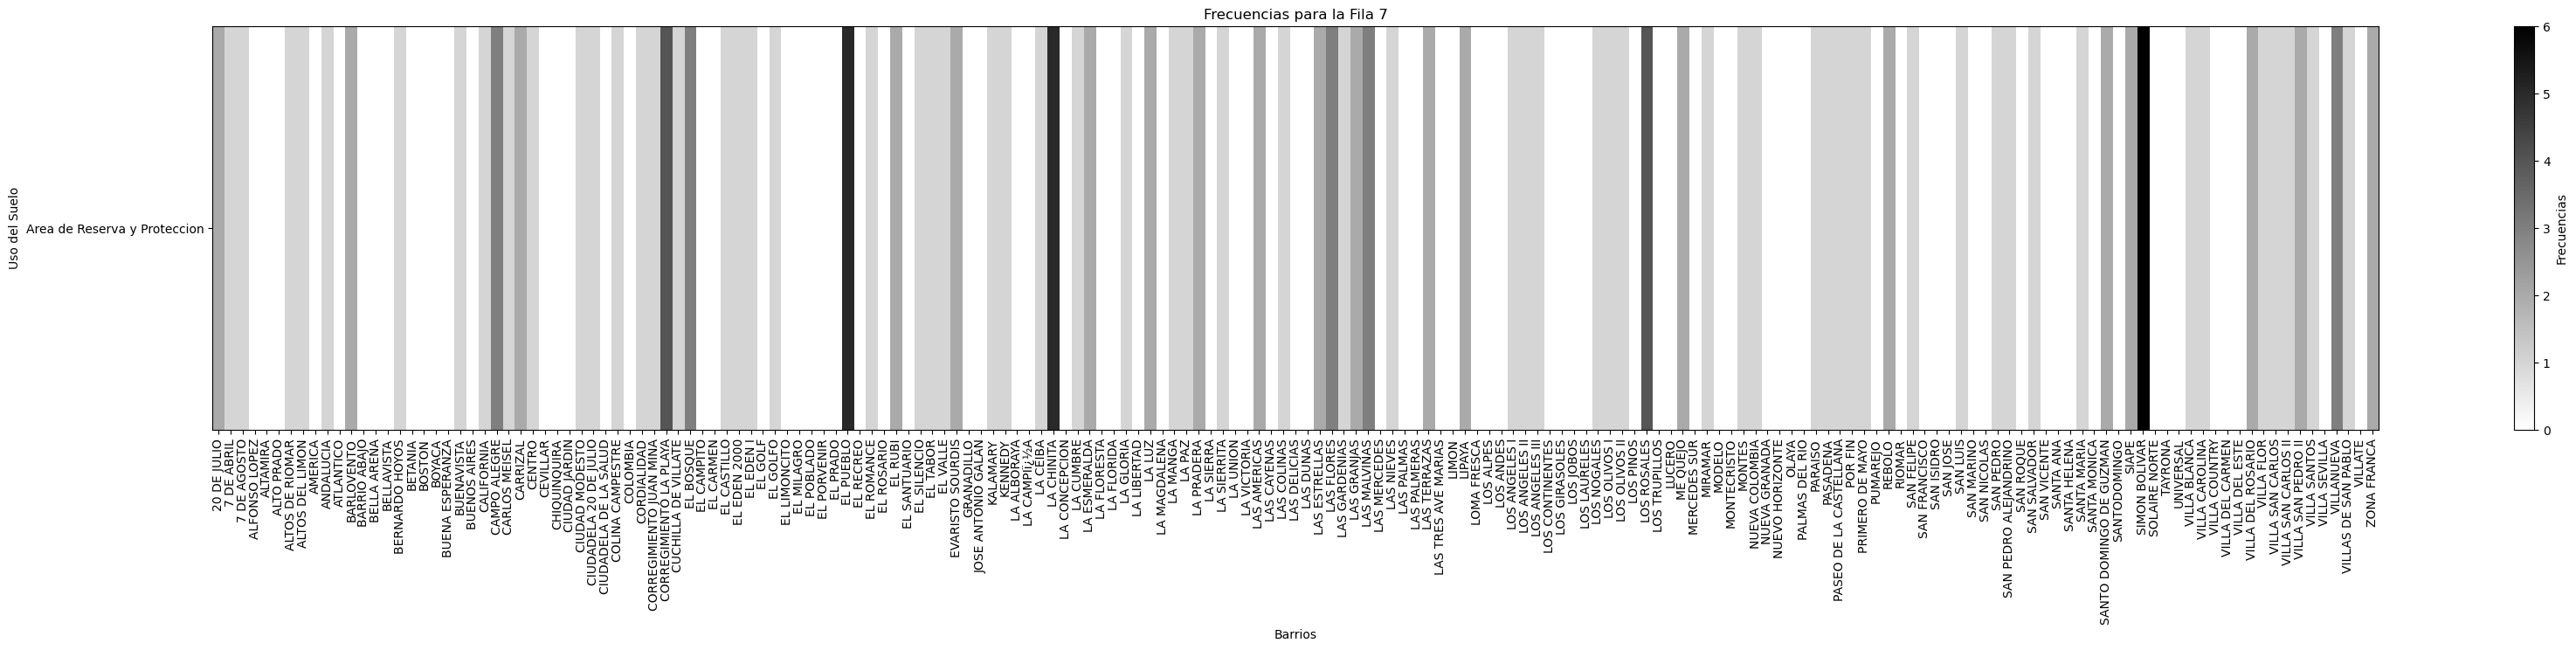

In [45]:
# Filtrar la fila 7
df_pivot_row7 = df_pivot.iloc[6:7, :]
plt.figure(figsize=(40, 6))
plt.imshow(df_pivot_row7, cmap='binary', interpolation='nearest', aspect='auto')
plt.xticks(range(len(df_pivot_row7.columns)), df_pivot_row7.columns, rotation=90)
plt.yticks([0], [df_pivot_row7.index[0]])
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias para la Fila 7')
plt.colorbar(label='Frecuencias')
plt.show()


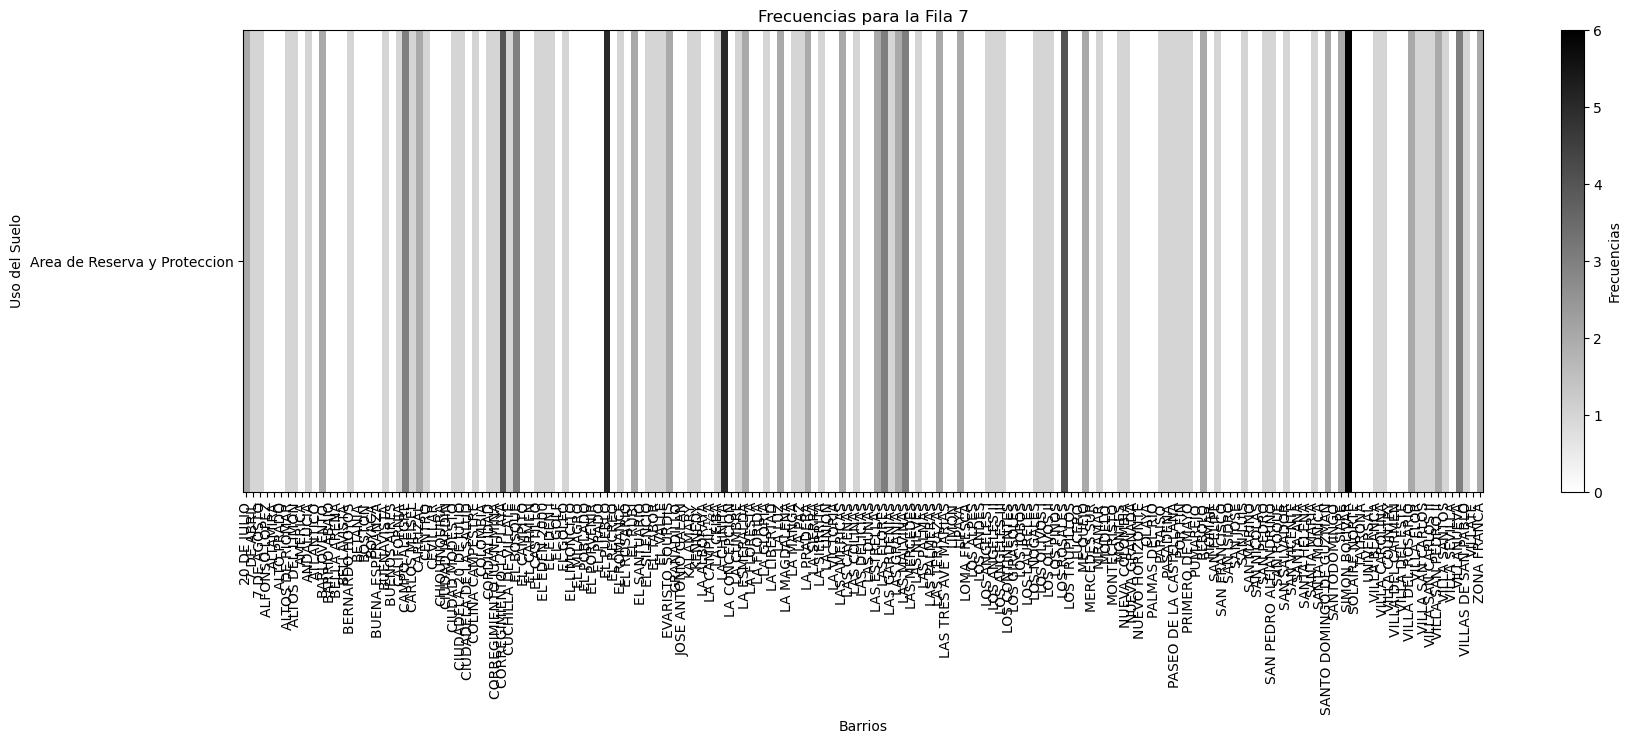

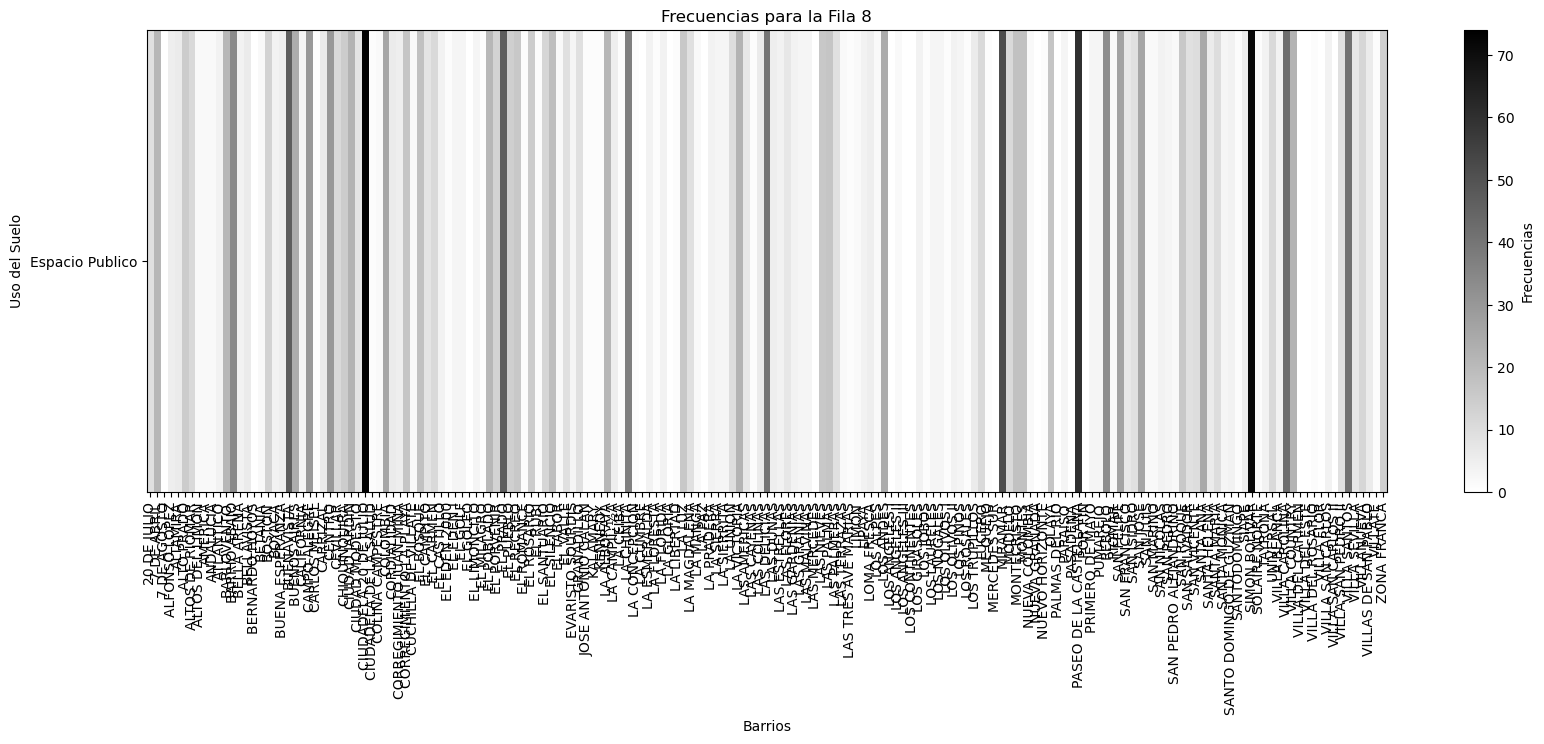

In [40]:

# Filtrar la fila 7
df_pivot_row7 = df_pivot.iloc[6:7, :]
plt.figure(figsize=(20, 6))
plt.imshow(df_pivot_row7, cmap='binary', interpolation='nearest', aspect='auto')
plt.xticks(range(len(df_pivot_row7.columns)), df_pivot_row7.columns, rotation=90)
plt.yticks([0], [df_pivot_row7.index[0]])
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias para la Fila 7')
plt.colorbar(label='Frecuencias')
plt.show()

# Filtrar la fila 8
df_pivot_row8 = df_pivot.iloc[7:8, :]
plt.figure(figsize=(20, 6))
plt.imshow(df_pivot_row8, cmap='binary', interpolation='nearest', aspect='auto')
plt.xticks(range(len(df_pivot_row8.columns)), df_pivot_row8.columns, rotation=90)
plt.yticks([0], [df_pivot_row8.index[0]])
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias para la Fila 8')
plt.colorbar(label='Frecuencias')
plt.show()

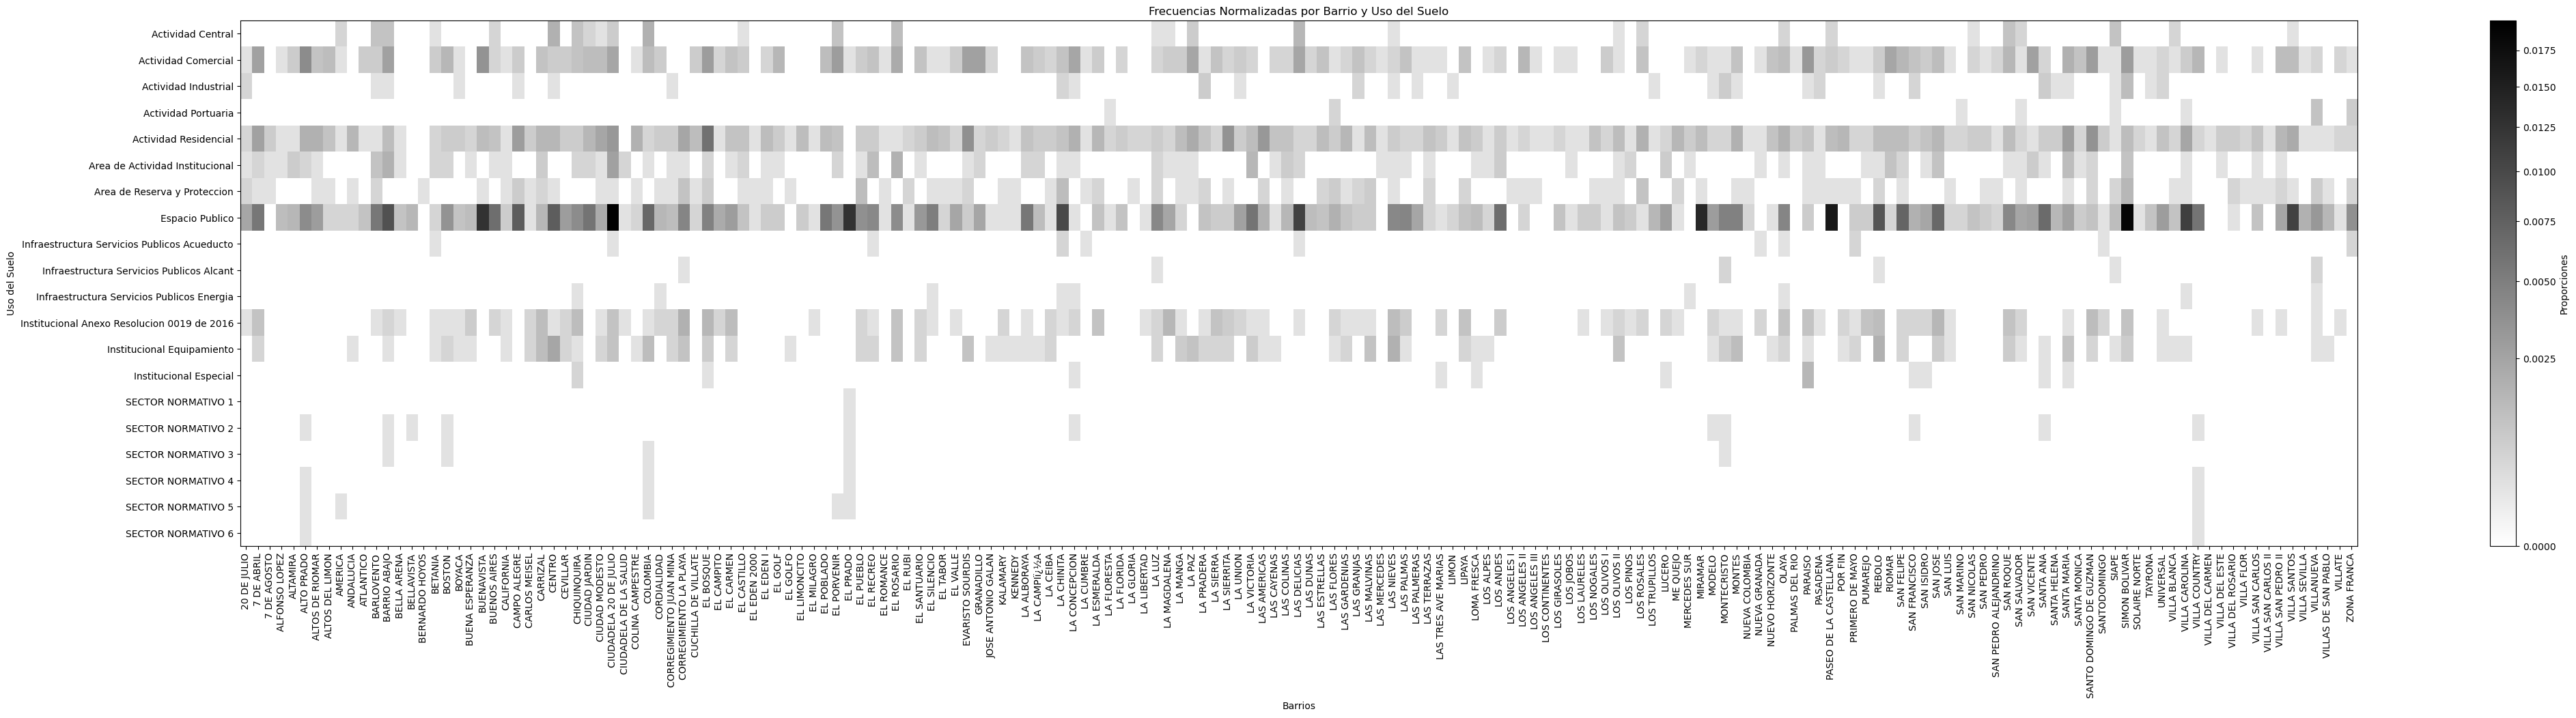

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalizar el DataFrame pivoteado
df_pivot_normalized = df_pivot / df_pivot.sum().sum()

# Configurar el tamaño de la figura
plt.figure(figsize=(50, 10))

# Graficar el DataFrame pivoteado normalizado
plt.imshow(df_pivot_normalized, cmap='binary', interpolation='nearest', aspect='auto', norm=mcolors.PowerNorm(gamma=0.5))

# Configurar etiquetas y título
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation=90)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xlabel('Barrios')
plt.ylabel('Uso del Suelo')
plt.title('Frecuencias Normalizadas por Barrio y Uso del Suelo')

# Mostrar la barra de color
plt.colorbar(label='Proporciones')

# Mostrar el gráfico
plt.show()

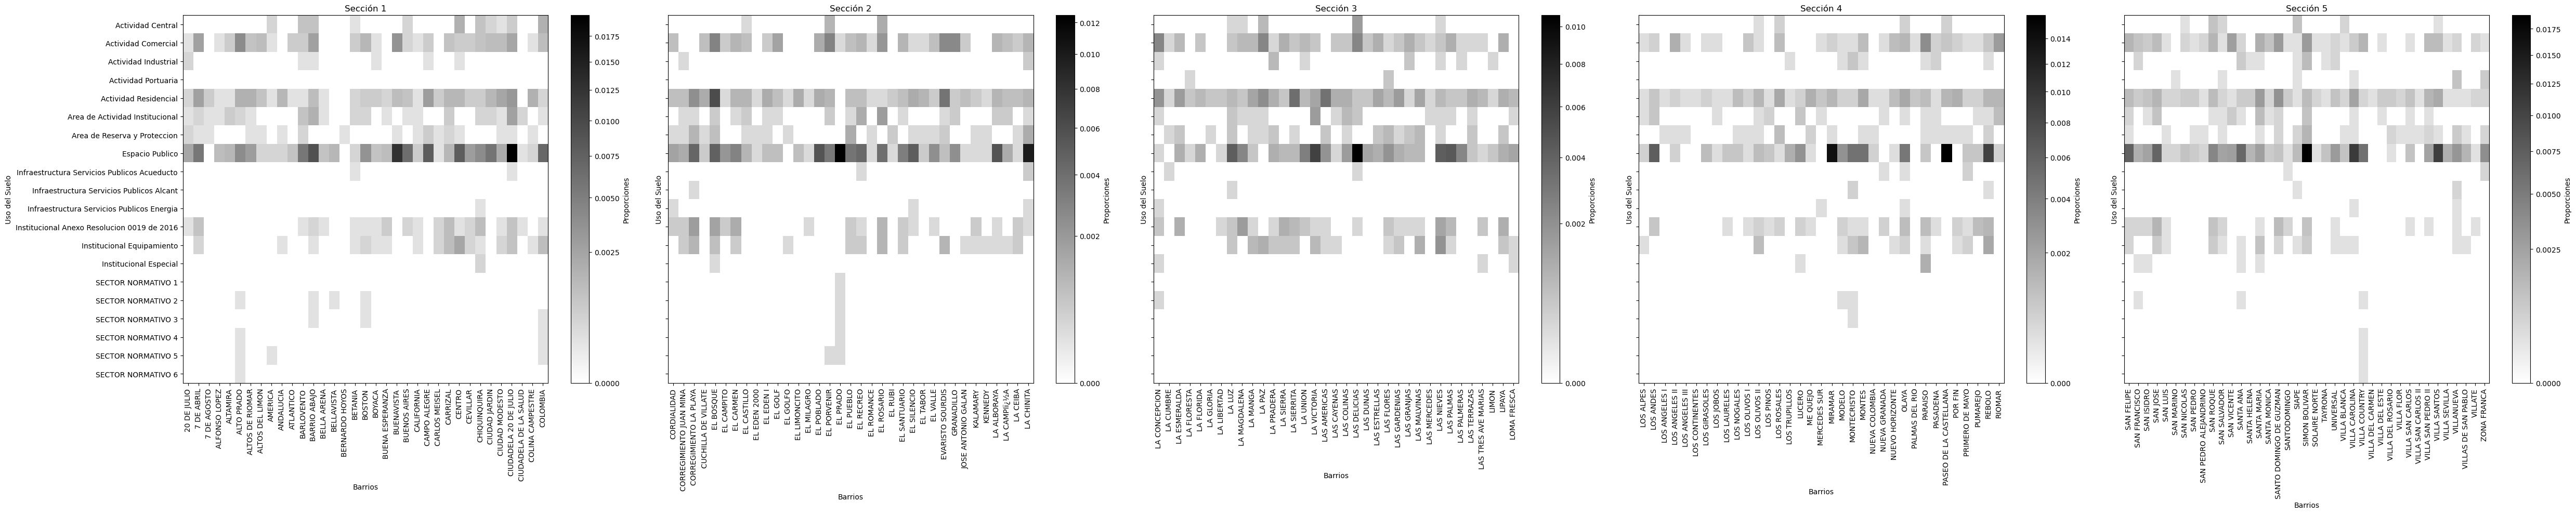

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalizar el DataFrame pivoteado
df_pivot_normalized = df_pivot / df_pivot.sum().sum()

# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(50, 10), sharey=True)

# Calcular el número de columnas en cada sección
num_sections = 5
columns_per_section = len(df_pivot.columns) // num_sections

# Graficar cada sección
for i, ax in enumerate(axes):
    start_idx = i * columns_per_section
    end_idx = (i + 1) * columns_per_section if i < (num_sections - 1) else len(df_pivot.columns)
    sub_df = df_pivot_normalized.iloc[:, start_idx:end_idx]

    im = ax.imshow(sub_df.values, cmap='binary', interpolation='nearest', aspect='auto', norm=mcolors.PowerNorm(gamma=0.5))

    ax.set_xticks(range(len(sub_df.columns)))
    ax.set_yticks(range(len(sub_df.index)))
    ax.set_xticklabels(sub_df.columns, rotation=90)
    ax.set_yticklabels(sub_df.index)
    ax.set_xlabel('Barrios')
    ax.set_ylabel('Uso del Suelo')
    ax.set_title(f'Sección {i + 1}')

    # Añadir la barra de color
    cbar = fig.colorbar(im, ax=ax, label='Proporciones')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [36]:
frecuencias

NOMBRE_right                                     ACTIVIDAD  frecuencia  \
0    20 DE JULIO                           Actividad Comercial           1   
1    20 DE JULIO                          Actividad Industrial           2   
2    20 DE JULIO                         Actividad Residencial           2   
3    20 DE JULIO               Area de Actividad Institucional           1   
4    20 DE JULIO                  Area de Reserva y Proteccion           2   
..           ...                                           ...         ...   
945  ZONA FRANCA                           Actividad Portuaria           3   
946  ZONA FRANCA                         Actividad Residencial           2   
947  ZONA FRANCA                  Area de Reserva y Proteccion           2   
948  ZONA FRANCA                               Espacio Publico          14   
949  ZONA FRANCA  Infraestructura Servicios Publicos Acueducto           2   

                                              geometry  
0    MULTIPOLYGON (((-74.83228 10.93347, -74.83231 ...  
1    MULTIPOLYGON (((-74.82888 10.93060, -74.82889 ...  
2    MULTIPOLYGON (((-74.82888 10.93060, -74.82933 ...  
3    MULTIPOLYGON (((-74.82571 10.92780, -74.82571 ...  
4    MULTIPOLYGON (((-74.83004 10.93091, -74.83015 ...  
..                                                 ...  
945  MULTIPOLYGON (((-74.81997 11.01114, -74.81996 ...  
946  MULTIPOLYGON (((-74.81871 11.01023, -74.81871 ...  
947  MULTIPOLYGON (((-74.81493 11.01416, -74.81458 ...  
948  MULTIPOLYGON (((-74.82062 11.01108, -74.82073 ...  
949  MULTIPOLYGON (((-74.82449 11.01346, -74.82449 ...  

[950 rows x 4 columns]